<a href="https://colab.research.google.com/github/LZatTD/sankey/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sat Dec 19 08:41:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! [ -e /content ] && pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 194kB 12.4MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 727kB 13.1MB/s 
     |████████████████████████████████| 1.1MB 32.9MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
Mounted at /content/gdrive


In [5]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

#path = Path('/content/gdrive/MyDrive/data')
#path.mkdir(parents=True, exist_ok=True)
#path = untar_data(URLs.PETS, dest=path); path

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(1)
#learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.076426,0.014967,0.004060,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.062672,0.026517,0.010149,01:14


In [6]:
img = PILImage.create('/content/gdrive/MyDrive/data/cat.jpeg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [7]:
img = PILImage.create('/content/gdrive/MyDrive/data/dog.jpeg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(16)

epoch,train_loss,valid_loss,time
0,2.779293,7.168980,00:01


epoch,train_loss,valid_loss,time
0,2.953999,2.341495,00:01
1,2.424873,1.830186,00:01
2,2.066488,1.421135,00:01
3,1.809155,1.477871,00:01
4,1.599620,1.093610,00:01
5,1.420714,1.014434,00:01
6,1.274861,0.957503,00:01
7,1.149059,0.990842,00:01
8,1.041918,0.828250,00:01
9,0.945316,0.826147,00:01


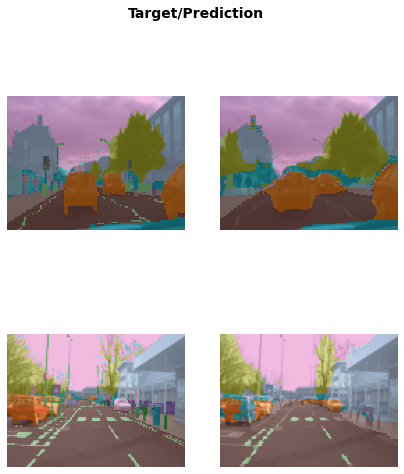

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.611810,0.397257,0.822120,01:34


epoch,train_loss,valid_loss,accuracy,time
0,0.320584,0.279554,0.879400,02:41
1,0.264287,0.235346,0.907680,02:41
2,0.204673,0.192046,0.926240,02:40
3,0.169296,0.187586,0.930720,02:40


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([6.1573e-04, 9.9938e-01]))

In [ ]:
Path.ls

<function fastcore.xtras.Path.ls>